In [1]:
from colorsys import hls_to_rgb
import math
import matplotlib.pyplot as plt
import numpy as np
import cmath
import sys


In [69]:
import numpy as np
import matplotlib.pyplot as plt

class GraficadorComplejo:
    def __init__(self, resolution=200):
        self.resolution = resolution

    def _parse_function(self, func_str):
        """Parses the input function string into a Python-executable function."""
        def f(z):
            return eval(func_str, {"z": z, "np": np, "sin": np.sin, "cos": np.cos, "exp": np.exp, "log": np.log})
        return f

    def color_y_brillo(self, func_str, xlim=(-2, 2), ylim=(-2, 2)):
        """Generates a plot using the color and brightness method."""
        f = self._parse_function(func_str)

        x = np.linspace(xlim[0], xlim[1], self.resolution)
        y = np.linspace(ylim[0], ylim[1], self.resolution)
        X, Y = np.meshgrid(x, y)
        Z = X + 1j * Y

        W = f(Z)
        magnitude = np.abs(W)
        phase = np.angle(W)

        hue = (phase + np.pi) / (2 * np.pi)  # Normalize phase to [0, 1]
        brightness = np.log1p(magnitude) / np.max(np.log1p(magnitude))  # Scale brightness to [0, 1]

        # HSV to RGB conversion
        HSV = np.zeros((*W.shape, 3))
        HSV[..., 0] = hue
        HSV[..., 1] = 1  # Maximum saturation
        HSV[..., 2] = brightness
        RGB = plt.cm.hsv(hue)
        RGB[..., :3] *= brightness[..., np.newaxis]

        plt.figure(figsize=(8, 8))
        plt.imshow(RGB, extent=(xlim[0], xlim[1], ylim[0], ylim[1]), origin="lower")
        plt.title(f"Color y Brillo: {func_str}")
        plt.xlabel("Re(z)")
        plt.ylabel("Im(z)")
        plt.show()

    def campo_vectorial(self, func_str, xlim=(-2, 2), ylim=(-2, 2)):
        """Generates a plot using the vector field method."""
        f = self._parse_function(func_str)

        x = np.linspace(xlim[0], xlim[1], self.resolution // 10)
        y = np.linspace(ylim[0], ylim[1], self.resolution // 10)
        X, Y = np.meshgrid(x, y)
        Z = X + 1j * Y

        W = f(Z)

        U = np.real(W)
        V = np.imag(W)

        plt.figure(figsize=(8, 8))
        plt.quiver(X, Y, U, V, color="blue", angles="xy")
        plt.title(f"Campo Vectorial: {func_str}")
        plt.xlabel("Re(z)")
        plt.ylabel("Im(z)")
        plt.xlim(xlim)
        plt.ylim(ylim)
        plt.grid(True)
        plt.show()



In [70]:
# Crear una instancia del graficador
graficador_complejo = GraficadorComplejo()




## funcion coseno

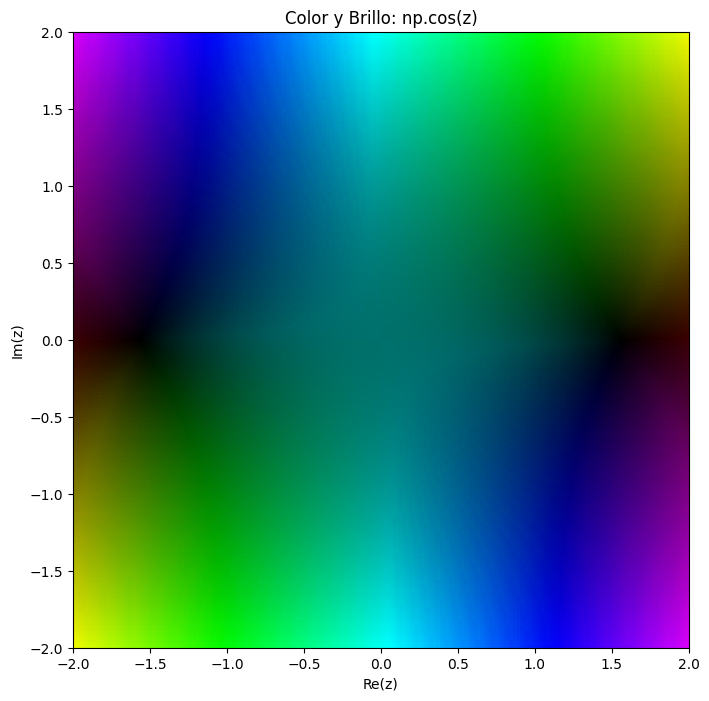

In [71]:
# Ejemplo de uso
graficador_complejo.color_y_brillo("np.cos(z)")

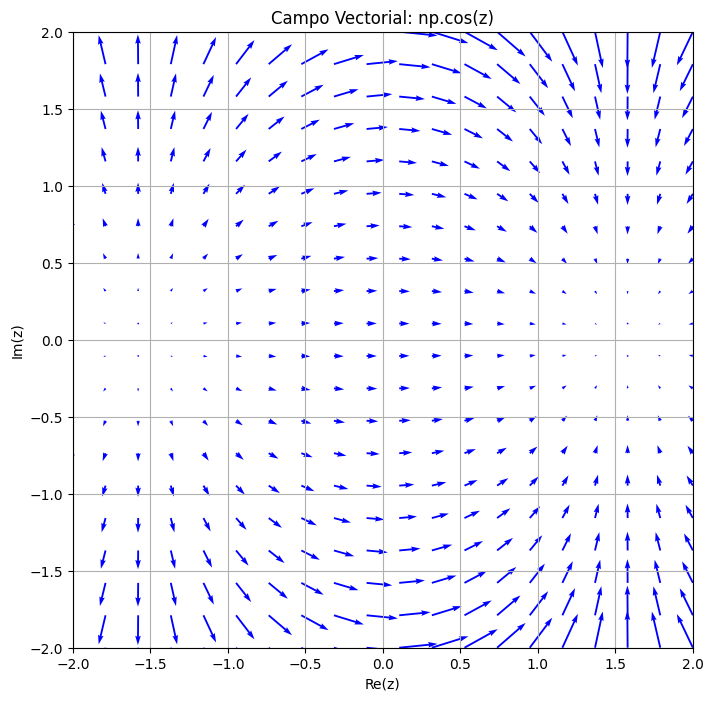

In [72]:
graficador_complejo.campo_vectorial("np.cos(z)")

## funcion seno

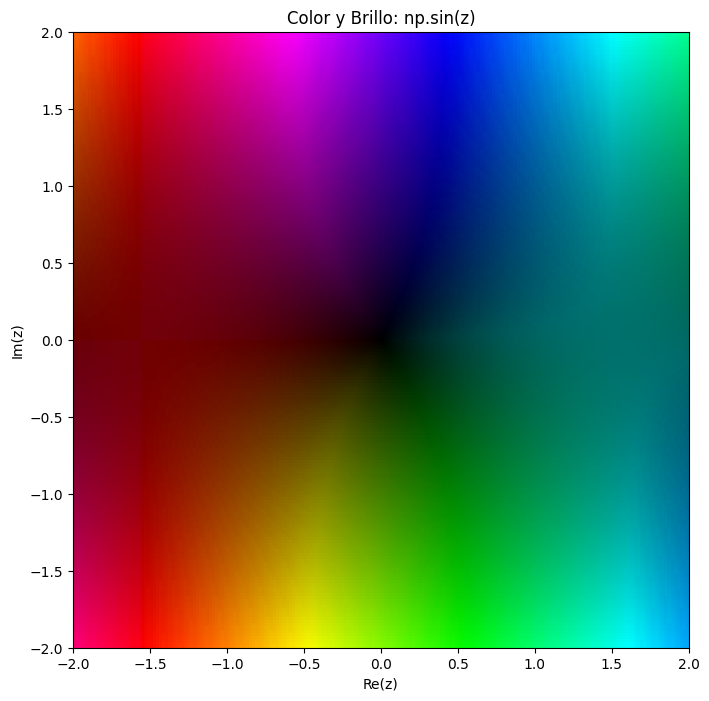

In [73]:
graficador_complejo.color_y_brillo("np.sin(z)")

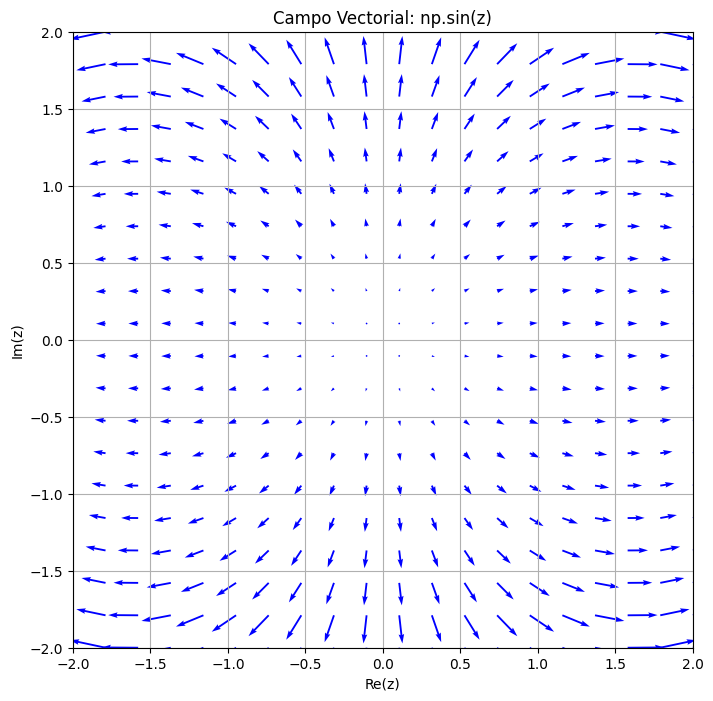

In [74]:
graficador_complejo.campo_vectorial("np.sin(z)")

## Funcion polinomica de Hermite



Se define como polinomio de Hermite a una familia de polinomios ortogonales que surgen en la solución de la ecuación diferencial de Hermite. Los polinomios de Hermite son soluciones de la ecuación diferencial de Hermite, que es una ecuación diferencial de segundo orden que se presenta en la mecánica cuántica y en la teoría cinética de los gases. Los polinomios de Hermite son una familia de polinomios ortogonales que se pueden definir de varias maneras. La definición más común es la que se obtiene a partir de la ecuación diferencial de Hermite. Los polinomios de Hermite son una familia de polinomios ortogonales que se pueden definir de varias maneras. La definición más común es la que se obtiene a partir de la ecuación diferencial de Hermite.
Su fórmula general es:
$$H_n(x) = (-1)^n e^{x^2} \frac{d^n}{dx^n} e^{-x^2}$$

para ver su comportamiento se graficara la función polinomica de Hermite de grado 5

In [76]:
# definir los polinomios de hermite a graficar
def hermite(n, x):
    if n == 0:
        return 1
    elif n == 1:
        return 2*x
    else:
        return 2*x*hermite(n-1, x) - 2*(n-1)*hermite(n-2, x)
    
def hermite2(n, x):
    if n == 0:
        return 1
    elif n == 1:
        return 2*x
    else:
        return 2*x*hermite2(n-1, x) - 2*(n-1)*hermite2(n-2, x)
    
def hermite3(n, x):
    if n == 0:
        return 1
    elif n == 1:
        return 2*x
    else:
        return 2*x*hermite3(n-1, x) - 2*(n-1)*hermite3(n-2, x)
    
def hermite4(n, x):
    if n == 0:
        return 1
    elif n == 1:
        return 2*x
    else:
        return 2*x*hermite4(n-1, x) - 2*(n-1)*hermite4(n-2, x)
    
def hermite5(n, x):
    if n == 0:
        return 1
    elif n == 1:
        return 2*x
    else:
        return 2*x*hermite5(n-1, x) - 2*(n-1)*hermite5(n-2, x)
    
    
# Crear una instancia del graficador
graficador_complejo = GraficadorComplejo()

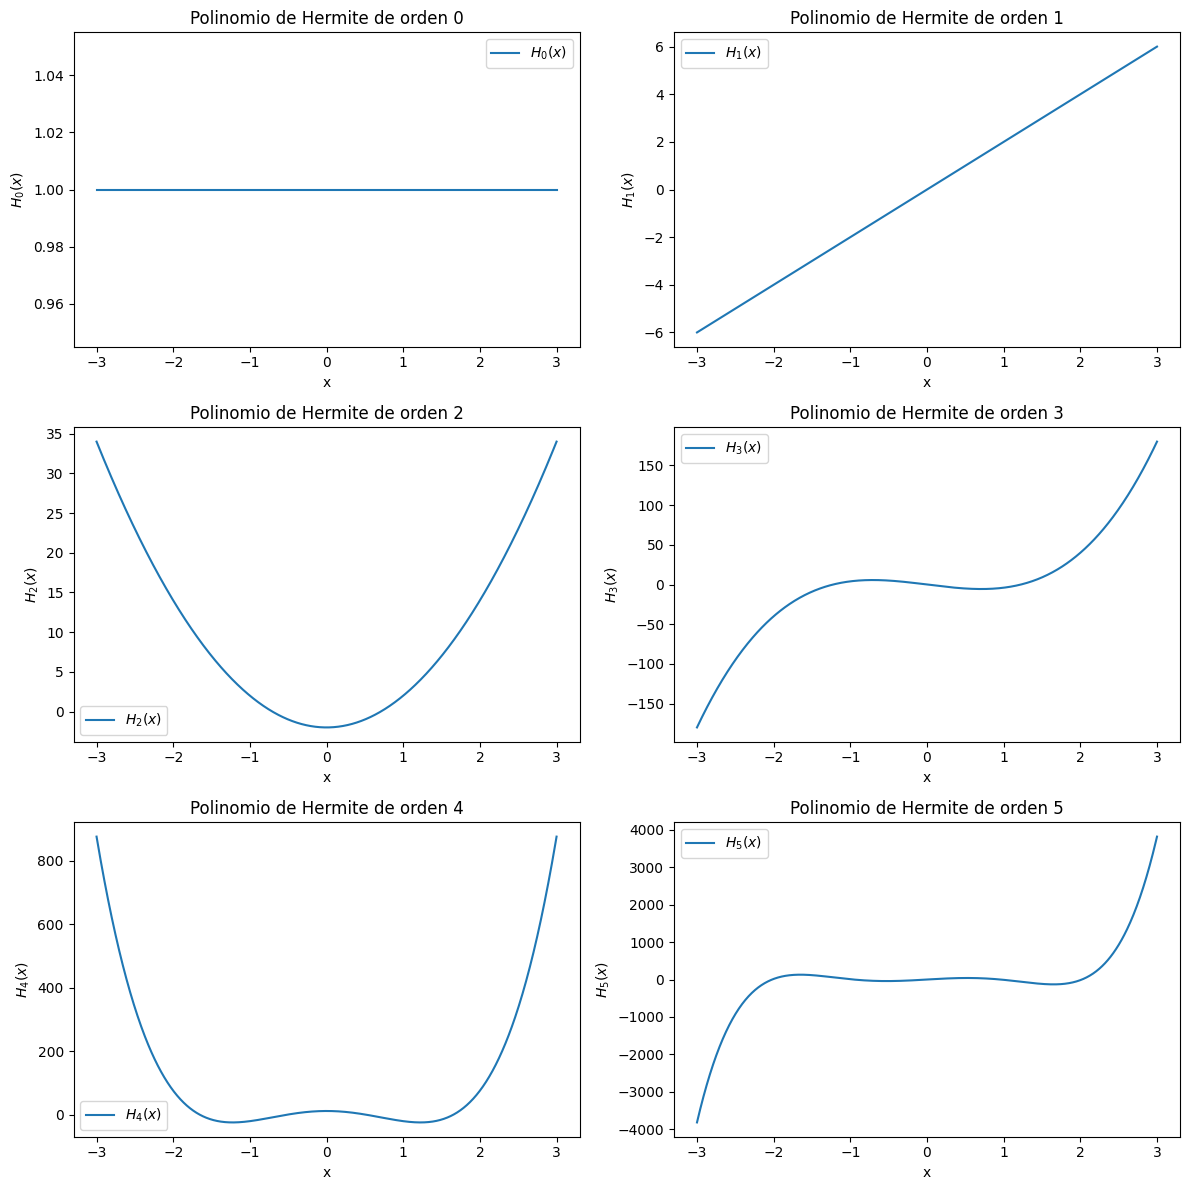

In [81]:
# Graficar los polinomios de hermite de orden 0 a 5 en 6 subplots
plt.figure(figsize=(12, 12))
for i in range(6):
    plt.subplot(3, 2, i+1)
    x = np.linspace(-3, 3, 1000)
    y = [hermite(i, xi) for xi in x]
    plt.plot(x, y, label=f"$H_{i}(x)$")
    plt.title(f"Polinomio de Hermite de orden {i}")
    plt.xlabel("x")
    plt.ylabel(f"$H_{i}(x)$")
    plt.legend()
plt.tight_layout()
plt.show()
